In [230]:
calosc = []

In [13]:
##################################################################1#########################################################
import pandas as pd
#IMPORT POWIERZCHNI CYLINDRYCZNYCH Z BAZY DANYCH MS SQL SERVER
for PART in range(1,205):
    import pyodbc 
    conn = pyodbc.connect('Driver={SQL Server};'
                          'Server=DESKTOP-M9VEMQ2\PAWELSQL;'
                          'Database=POWIERZCHNIE;'
                          'Trusted_Connection=yes;')

    cursor = conn.cursor()
    if PART<10:
        cursor.execute(f"SELECT Diameter, Length, Radius, Fit, IT, Ra, Rm, IDPart FROM Feat_1000 WHERE IDPart ='Part000'+'{PART}' ORDER BY IDPart")
    if (PART>10 & PART<100):
         cursor.execute(f"SELECT Diameter, Length, Radius, Fit, IT, Ra, Rm, IDPart FROM Feat_1000 WHERE IDPart ='Part00'+'{PART}' ORDER BY IDPart")
    else:
         cursor.execute(f"SELECT Diameter, Length, Radius, Fit, IT, Ra, Rm, IDPart FROM Feat_1000 WHERE IDPart ='Part0'+'{PART}' ORDER BY IDPart")
    
    lista = []
    for row in cursor:
        Diameter=row[0]
        Length=row[1]
        Radius=row[2]
        Fit=row[3]
        IT=row[4]
        Ra=row[5]
        Wytrz=row[6]
        PartID=row[7]
        element = [Diameter, Length, Radius, Fit, IT, Ra, Wytrz,PartID]
        lista.append(element)
    conn.close()
    x = len(lista)
    suma = 0
    licznik = 0
    maks = 0
    for x in range(0,x):
        suma = suma+lista[x][1]
        licznik = licznik + lista[x][1]*lista[x][0]
        if maks<lista[x][0]:
            maks = lista[x][0]
        else:
            maks = maks   
    #Rm = lista[x][6]
    
    print(lista)
    
############################################################2#################################################################

#IMPORT TOKAREK Z BAZY DANYCH MS SQL SERVER
#PYTANIE: NA JAKICH ZASADACH DOBIERAMY TOKARKE???//POZNIEJ
    import pyodbc 
    conn = pyodbc.connect('Driver={SQL Server};'
                          'Server=DESKTOP-M9VEMQ2\PAWELSQL;'
                          'Database=Projekt inzynierski;'
                          'Trusted_Connection=yes;')

    cursor = conn.cursor()
    cursor.execute("SELECT MTDescription, Power, n_max,B,H  FROM Tokarki ORDER BY Power DESC;")

    lista2 = []

    for row in cursor:
        Name = row[0]
        Power = row[1]
        F_dop = row[2]
        B_socket = row[3]
        H_socket = row[4]
    
        element2 = [Name, Power, F_dop,B_socket,H_socket]
        lista2.append(element2)
    conn.close()
    lista2
    Nazwa = lista2[13][0]
    print("Została wybrana tokarka:",Nazwa)
    Moc = lista2[13][1]
    print("O danej mocy:",Moc)
    F_dop_tok = lista2[13][2]
    print("Dopuszczalna siła posuwu:",F_dop_tok)
    BB = lista2[13][3]
    HH = lista2[13][4]
    Rozmiar_gniazda = str(int(lista2[13][3]))+'x'+str(int(lista2[13][4]))
    print("Rozmiar gniazda:",Rozmiar_gniazda)

    for i in range(len(lista)):
        lista[i].append(Moc)
        lista[i].append(F_dop_tok)
        lista[i].append(BB)
        lista[i].append(HH)

###################################################################3###############################################

#Pobieranie danych noża z bazy danych MS SQL SERVER
    import pyodbc 
    conn = pyodbc.connect('Driver={SQL Server};'
                          'Server=DESKTOP-M9VEMQ2\PAWELSQL;'
                          'Database=Projekt inzynierski;'
                          'Trusted_Connection=yes;')

    cursor = conn.cursor()
    cursor.execute(f"SELECT ISO, NAZWA, b, h, Re, Kąt FROM Noze WHERE Kąt<'90' AND {BB} = b AND {HH} = h AND Re = 0.8" )
    #Dla obróbki średniodokładnej przyjmuje sie re = 0,8

    lista3 = []

    for row in cursor:
        ISO = row[0]
        NAZWA = row[1]
        b = row[2]
        h = row[3]
        Re = row[4]
        Kat = row[5]
        element3 = [ISO,NAZWA,b,h,Re,Kat]
        lista3.append(element3)   
    conn.close()
    lista3
    #Nazwa_noza = lista3[1][1]
    Zmienna1 = lista3[0][2]
    Zmienna2 = lista3[0][3]
    Chropowatosc=lista3[0][4]
    Kat = lista3[0][5]
    #print("Nazwa noża:",Nazwa_noza)
    #print("O danym przekroju",Zmienna1,"x",Zmienna2, "oraz chopowatości wynoszącej:",Chropowatosc)
    print(lista3)
    for i in range(len(lista)):
        lista[i].append(NAZWA)
        lista[i].append(Chropowatosc)
        lista[i].append(Kat)


###########################################################################4################################################

    #DANE STAŁE LUB Z BAZY DANYCH DO UZGODNIENIA
    #DŁUGOŚC CAŁKOWITA OBRABIANEGO PRZEDMIOTU
    #SREDNICA PRZED OBROBKA
    #Określenie maksymalnej głębokości skrawania ap [mm] przewidzianej do usunięcia przy toczeniu zgrubnym
    CALKOWITA_DLUGOSC = suma # Dlugosc obliczona na poczatku programu
    SREDNICA_PRZED = round(licznik/CALKOWITA_DLUGOSC,0) #ŚREDNIA ŚREDNICA

    import pyodbc 
    conn = pyodbc.connect('Driver={SQL Server};'
                          'Server=DESKTOP-M9VEMQ2\PAWELSQL;'
                          'Database=Projekt inzynierski;'
                          'Trusted_Connection=yes;')

    for i in range(len(lista)):
    
        cursor = conn.cursor()
        cursor.execute(f"SELECT Qnorm FROM Naddatki_Zgrubna Where {suma} BETWEEN Lmin AND Lmax AND {SREDNICA_PRZED} BETWEEN Dmin AND Dmax")
    for row in cursor:
            Qzgr = row[0]

    Srednica_min = maks + Qzgr 
    #zbior_srednic_polfabrykatu = [8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,
                              #28,30,32,33,34,35,36,38,40,41,42,43,45,48,50,52,55,60,63,
                            # 65,68,70,75,85,90,95,100,105,110,115,120,125,130,135,140,
                            #145,150,155,160,165,170,175,180,190,200,225,250]



    import pyodbc 
    conn = pyodbc.connect('Driver={SQL Server};'
                          'Server=DESKTOP-M9VEMQ2\PAWELSQL;'
                          'Database=Projekt inzynierski;'
                          'Trusted_Connection=yes;')

    cursor = conn.cursor()
    cursor.execute(f"SELECT WYBIERZ FROM srednica_polfabrykat Where {Srednica_min} BETWEEN MIN AND MAX")

    for row in cursor:
        srednica_polfabrykatu= row[0]

    for x in range(0,len(lista)):
        ap =  (srednica_polfabrykatu - lista[x][0])/2
        print("Maksymalna głębokość skrawania ap:",ap)
        lista[x].append(ap)
        lista[x].append(srednica_polfabrykatu)
    print(srednica_polfabrykatu)

    #######################################################################5############################################
    #Ustalenie dopuszczalnej wartości siły skrawania [N] min Fcdop
    #Ze względu na wytrzymałość mechanizmów ruchu posuwowego obrabiarki:
    Fc_dop_1 = 4*F_dop_tok
    for i in range(len(lista)):
        lista[i].append(Fc_dop_1)
    print("Dopuszczalna wartość siły skrawania w [N]:", Fc_dop_1,"[N]")

####################################################################6#####################################

    # Fc_dop_2 ze względu na wytrzymałość trzonka noża

    import pyodbc 
    conn = pyodbc.connect('Driver={SQL Server};'
                          'Server=DESKTOP-M9VEMQ2\PAWELSQL;'
                          'Database=Projekt inzynierski;'
                          'Trusted_Connection=yes;')

    cursor = conn.cursor()
    cursor.execute(f"SELECT SILA1 FROM Fc_dop Where ZMIENNA1 = {Zmienna1} and ZMIENNA2 = {Zmienna2}")

    for row in cursor:
        Fc_dop_2=row[0]
    conn.close()
    print('Dopuszczalna wartość siły skrawania ze względu na wytrzymałość trzonka noża:',Fc_dop_2)
    for i in range(len(lista)):
        lista[i].append(Fc_dop_2)

    #####################################################7#####################################

    #Obliczanie smukłości
    SMUKLOSC_OBL = CALKOWITA_DLUGOSC/maks
    print("Smukłość wynosi: ")
    print(round(SMUKLOSC_OBL,0))
    SMUKLOSC = round(SMUKLOSC_OBL,0)

    for i in range(len(lista)):
        lista[i].append(SMUKLOSC)
    #Ze względu na sztywność przedmiotu i sposób jego zamocowania Fcdop3
    import pyodbc 
    conn = pyodbc.connect('Driver={SQL Server};'
                          'Server=DESKTOP-M9VEMQ2\PAWELSQL;'
                          'Database=Projekt inzynierski;'
                          'Trusted_Connection=yes;')

    cursor = conn.cursor()
    cursor.execute(f"SELECT SMUKLOSC, SREDNICA, SILA FROM Fc_dop3 Where SMUKLOSC = {SMUKLOSC}")

    lista4 = []

    for row in cursor:
        SMUKLOSC_1 = row[0]
        SREDNICA_1 = row[1]
        SILA_1 = row[2]
        element4 = [SMUKLOSC_1,SREDNICA_1,SILA_1]
        lista4.append(element4)
        #print(row)
    conn.close()
    lista4
    SILA_POCZATKOWA_15 = lista4[0][2]
    SILA_KONCOWA_300 = lista4[9][2]
    print("Sila poczatkowa 15 wynosi:",SILA_POCZATKOWA_15,"Sila koncowa 300 wynosi:",SILA_KONCOWA_300)

    #Funkcja liczaca fcdop3 na bazie tabelki z książki 
    def fun(a,b):
        return (b-a)/285

    def funkcja(a, b, x):
        return a+(x-15)*fun(a,b)

    Fc_dop_3 = round(funkcja(SILA_POCZATKOWA_15,SILA_KONCOWA_300, maks),1)
    print("Sila Fc_dop3 wynosi:",Fc_dop_3)
    for i in range(len(lista)):
        lista[i].append(Fc_dop_3)

####################################################8#######################################################

    #Wybieramy najmniejszą wartość z Fc_dop
    TUPLE_FC_DOP = [Fc_dop_1, Fc_dop_2, Fc_dop_3]
    Fc_dop_min = min(TUPLE_FC_DOP)
    print("Najmniejsza wartość Fc_dop to:",Fc_dop_min)
    for i in range(len(lista)):
        lista[i].append(Fc_dop_min)

###################################################9########################################################

    #TOLERANCJA
    import pyodbc 
    conn = pyodbc.connect('Driver={SQL Server};'
                          'Server=DESKTOP-M9VEMQ2\PAWELSQL;'
                          'Database=Projekt inzynierski;'
                          'Trusted_Connection=yes;')

    for x in range(0,len(lista)):
        cursor = conn.cursor()
        cursor.execute(f"SELECT T FROM Tolerancje_IT Where IT = '{lista[x][4]}' AND {lista[x][0]} BETWEEN DMIN AND DMAX and  DMAX != {lista[x][0]}")

        for row in cursor:
            listaa = []
            listaa.append(row)
            T = listaa[0][0]
            print("Tolerancje dla poszczególnych segmentów: T=",T)
            lista[x].append(T)
        
####################################################10##################################################

    #OBLICZANIE MOCY UŻYTECZNEJ TOKARKI
    P_użyteczna = 0.75 * Moc
    print("Moc użyteczna tokarki wynosi:",P_użyteczna,"Kw")
    for i in range(len(lista)):
        lista[i].append(P_użyteczna)

###################################################11########################################################

    #OBLICZAMY PRĘDKOŚĆ SKRAWANIA VC
    Vc = (P_użyteczna * 60000)/Fc_dop_min
    print("Prędkość skrawania wynosi:",Vc,"m/min")
    for i in range(len(lista)):
        lista[i].append(Vc)

    #OBLICZAMY PRĘDKOŚĆ OBROTOWĄ WRZECIONA n
    n = (Vc * 1000)/(3.14*SREDNICA_PRZED)
    n_round = round(n,2)
    print("Prędkość obrotowa wrzeciona wynosi:",n_round,"obrót/min")
    for i in range(len(lista)):
        lista[i].append(n_round)

    #OBLICZAMY DOPUSZCZALNĄ WARTOŚĆ POSUWU f
    Ad_dop = Fc_dop_min/(Rm*3.5)
    for x in range(0,len(lista)):
        ap =  (srednica_polfabrykatu - lista[x][0])/2
        f_dop = Ad_dop / ap
        f_dop_round = round(f_dop,2)
        print("Dopuszczalna wartość posuwu wynosi:",f_dop_round,"mm/min")
        lista[x].append(f_dop_round)

    #OBLICZAMY OBJĘTOŚCIOWĄ WYDAJNOŚĆ SKRAWANIA Q
    for x in range(0,len(lista)):
        ap =  (srednica_polfabrykatu - lista[x][0])/2
        Q = Vc * ap * f_dop
        Q_round = round(Q,2)
        print("Objętościowa wydajność skrawania wynosi:",Q_round,"cm^3/min")
        lista[x].append(Q_round)

    #OBLICZAMY CZAS GŁÓWNEGO SKRAWANIA t_g
    t_g = CALKOWITA_DLUGOSC/(f_dop*n)
    t_g_round = round(t_g,2)
    print("Czas skrawania wynosi:",t_g_round,"min")
    for i in range(len(lista)):
        lista[i].append(t_g_round)

    #ILOŚĆ SZTUK WYKONANYCH W OKRESIE TRWAŁOŚCI NOŻA
    ilosc = 60/t_g
    ilosc_round = round(ilosc,0)
    print("Ilość sztuk wynosi:",ilosc_round,"szt")
    for i in range(len(lista)):
        lista[i].append(ilosc_round)
    calosc += lista


[]
Została wybrana tokarka: Tokarka produkcyjna
O danej mocy: 7.5
Dopuszczalna siła posuwu: 1400.0
Rozmiar gniazda: 25x25
[['ISO 8', 'Nóż wytaczak prosty', 25.0, 25.0, 0.8, 60.0]]


ZeroDivisionError: division by zero

In [210]:
import pandas as pd

In [211]:
df = pd.DataFrame(lista)

In [212]:
df.columns = ['Diameter', 'Length', 'Radius', 'Fit', 'IT','Ra', 'Rm','IDPart', 'Moc_tok', 'F_dop_tok', 'b', 'h','Noz','R','Kat_noz','ap','D_fab','Fc_dop_1','Fc_dop_2','Smuklosc','Fc_dop_3','Fc_dop_min','Tolerancja','P_uzyteczna','Vc','n','dop_posuw','Q','t_g','sztuk']

In [213]:
len(['Diameter', 'Length', 'Radius', 'Fit', 'IT','Ra', 'Rm','IDPart', 'Moc_tok', 'F_dop_tok', 'b', 'h','Noz','R','Kat_noz','ap','D_fab','Fc_dop_1','Fc_dop_2','Smuklosc','Fc_dop_3','Fc_dop_min','Tolerancja','P_uzyteczna','Vc','n','dop_posuw','Q','t_g','sztuk'])

30

In [214]:
df

,Diameter,Length,Radius,Fit,IT,Ra,Rm,IDPart,Moc_tok,F_dop_tok,...,Fc_dop_3,Fc_dop_min,Tolerancja,P_uzyteczna,Vc,n,dop_posuw,Q,t_g,sztuk
0,30.0,20.0,0.0,None,12.0,5.00,540.0,Part0033,7.5,1400.0,...,4998.7,4998.7,0.250,5.625,67.517555,597.29,0.29,229.59,2.1,29.0
1,32.0,50.0,0.0,n6,6.0,0.63,540.0,Part0033,7.5,1400.0,...,4998.7,4998.7,0.016,5.625,67.517555,597.29,0.33,204.08,2.1,29.0
2,33.5,45.0,0.0,None,12.0,5.00,540.0,Part0033,7.5,1400.0,...,4998.7,4998.7,0.250,5.625,67.517555,597.29,0.36,184.95,2.1,29.0
3,34.0,60.0,0.5,j6,6.0,0.63,540.0,Part0033,7.5,1400.0,...,4998.7,4998.7,0.016,5.625,67.517555,597.29,0.38,178.57,2.1,29.0
4,39.0,40.0,0.0,None,12.0,5.00,540.0,Part0033,7.5,1400.0,...,4998.7,4998.7,0.250,5.625,67.517555,597.29,0.59,114.80,2.1,29.0
5,40.0,60.0,0.0,n6,6.0,0.32,540.0,Part0033,7.5,1400.0,...,4998.7,4998.7,0.016,5.625,67.517555,597.29,0.66,102.04,2.1,29.0
6,46.0,20.0,0.0,None,12.0,5.00,540.0,Part0033,7.5,1400.0,...,4998.7,4998.7,0.250,5.625,67.517555,597.29,2.64,25.51,2.1,29.0
7,42.0,50.0,0.0,None,12.0,5.00,540.0,Part0033,7.5,1400.0,...,4998.7,4998.7,0.250,5.625,67.517555,597.29,0.88,76.53,2.1,29.0
8,36.0,60.0,0.0,n6,6.0,0.32,540.0,Part0033,7.5,1400.0,...,4998.7,4998.7,0.016,5.625,67.517555,597.29,0.44,153.06,2.1,29.0
9,35.5,40.0,0.0,None,12.0,5.00,540.0,Part0033,7.5,1400.0,...,4998.7,4998.7,0.250,5.625,67.517555,597.29,0.42,159.44,2.1,29.0


In [174]:
df.to_excel("output.xlsx")

In [175]:
from sklearn import datasets

In [176]:
iris = datasets.load_iris()

In [177]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [43]:
X = iris.data[:, :3]  # we only take the first two features.
y = iris.target

In [44]:
import matplotlib.pyplot as plt

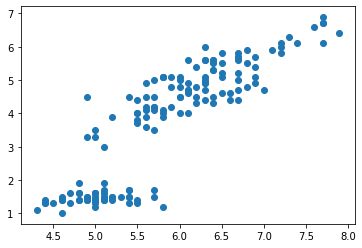

In [45]:
plt.scatter(X[:,0], X[:,2])

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
lr = LinearRegression()

In [53]:
lr.fit(X[:,0].reshape(-1,1), X[:,2].reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

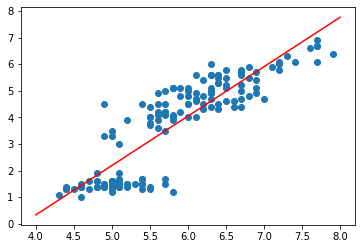

In [64]:
import numpy as np
x = np.linspace(4,8,100)
y = 1.85843298*x-7.10144337
plt.plot(x, y, '-r', label='y=2x+1')
plt.scatter(X[:,0], X[:,2])
plt.show()

In [62]:
lr.intercept_

array([-7.10144337])

In [66]:
X[:,0], X[:,2]

(array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
        4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
        5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
        5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
        6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
        6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
        6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
        6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
        6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
        7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
        7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
        6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9]),
 array([1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4,
        1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1. , 1.7, 1.9, 1.6,
      

In [72]:
lr.predict(np.array([7.2]).reshape(-1,1))

array([[6.27927407]])

In [186]:
lista

[[38.0,
  80.0,
  0.0,
  'k6',
  6.0,
  0.63,
  420.0,
  'Part0001',
  7.5,
  1400.0,
  25.0,
  25.0,
  'Nóż wytaczak prosty',
  0.8,
  60.0,
  63.5,
  165.0,
  5600.0,
  13850,
  70.0],
 [40.0,
  33.0,
  0.0,
  'h8',
  8.0,
  1.25,
  420.0,
  'Part0001',
  7.5,
  1400.0,
  25.0,
  25.0,
  'Nóż wytaczak prosty',
  0.8,
  60.0,
  62.5,
  165.0,
  5600.0,
  13850,
  70.0],
 [45.0,
  72.0,
  0.0,
  'k6',
  6.0,
  0.63,
  420.0,
  'Part0001',
  7.5,
  1400.0,
  25.0,
  25.0,
  'Nóż wytaczak prosty',
  0.8,
  60.0,
  60.0,
  165.0,
  5600.0,
  13850,
  70.0],
 [40.0,
  48.0,
  0.0,
  'h8',
  8.0,
  1.25,
  420.0,
  'Part0001',
  7.5,
  1400.0,
  25.0,
  25.0,
  'Nóż wytaczak prosty',
  0.8,
  60.0,
  62.5,
  165.0,
  5600.0,
  13850,
  70.0],
 [75.0,
  110.0,
  0.0,
  'k6',
  6.0,
  0.63,
  1000.0,
  'Part0002',
  7.5,
  1400.0,
  25.0,
  25.0,
  'Nóż wytaczak prosty',
  0.8,
  60.0,
  45.0,
  165.0,
  5600.0,
  13850,
  70.0],
 [80.0,
  52.0,
  0.0,
  None,
  12.0,
  5.0,
  1000.0,
  'Part

In [187]:
df = pd.DataFrame(lista)

In [188]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,38.0,80.0,0.0,k6,6.0,0.63,420.0,Part0001,7.5,1400.0,25.0,25.0,Nóż wytaczak prosty,0.8,60.0,63.50,165.0,5600.0,13850,70.0
1,40.0,33.0,0.0,h8,8.0,1.25,420.0,Part0001,7.5,1400.0,25.0,25.0,Nóż wytaczak prosty,0.8,60.0,62.50,165.0,5600.0,13850,70.0
2,45.0,72.0,0.0,k6,6.0,0.63,420.0,Part0001,7.5,1400.0,25.0,25.0,Nóż wytaczak prosty,0.8,60.0,60.00,165.0,5600.0,13850,70.0
3,40.0,48.0,0.0,h8,8.0,1.25,420.0,Part0001,7.5,1400.0,25.0,25.0,Nóż wytaczak prosty,0.8,60.0,62.50,165.0,5600.0,13850,70.0
4,75.0,110.0,0.0,k6,6.0,0.63,1000.0,Part0002,7.5,1400.0,25.0,25.0,Nóż wytaczak prosty,0.8,60.0,45.00,165.0,5600.0,13850,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,46.0,20.0,0.0,None,12.0,5.00,540.0,Part0033,7.5,1400.0,25.0,25.0,Nóż wytaczak prosty,0.8,60.0,59.50,165.0,5600.0,13850,70.0
184,42.0,50.0,0.0,None,12.0,5.00,540.0,Part0033,7.5,1400.0,25.0,25.0,Nóż wytaczak prosty,0.8,60.0,61.50,165.0,5600.0,13850,70.0
185,36.0,60.0,0.0,n6,6.0,0.32,540.0,Part0033,7.5,1400.0,25.0,25.0,Nóż wytaczak prosty,0.8,60.0,64.50,165.0,5600.0,13850,70.0
186,35.5,40.0,0.0,None,12.0,5.00,540.0,Part0033,7.5,1400.0,25.0,25.0,Nóż wytaczak prosty,0.8,60.0,64.75,165.0,5600.0,13850,70.0


In [232]:
len(calosc)

188

In [233]:
df = pd.DataFrame(calosc)

In [234]:
df

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,38.0,80.0,0.0,k6,6.0,0.63,420.0,Part0001,7.5,1400.0,...,1080.0,1080.0,0.016,5.625,312.500000,2427.37,0.12,275.51,0.65,92.0
1,40.0,33.0,0.0,h8,8.0,1.25,420.0,Part0001,7.5,1400.0,...,1080.0,1080.0,0.039,5.625,312.500000,2427.37,0.15,229.59,0.65,92.0
2,45.0,72.0,0.0,k6,6.0,0.63,420.0,Part0001,7.5,1400.0,...,1080.0,1080.0,0.016,5.625,312.500000,2427.37,0.29,114.80,0.65,92.0
3,40.0,48.0,0.0,h8,8.0,1.25,420.0,Part0001,7.5,1400.0,...,1080.0,1080.0,0.039,5.625,312.500000,2427.37,0.15,229.59,0.65,92.0
4,75.0,110.0,0.0,k6,6.0,0.63,1000.0,Part0002,7.5,1400.0,...,2280.0,2280.0,0.019,5.625,148.026316,561.22,0.05,160.71,8.82,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,46.0,20.0,0.0,None,12.0,5.00,540.0,Part0033,7.5,1400.0,...,4998.7,4998.7,0.250,5.625,67.517555,597.29,2.64,25.51,2.10,29.0
184,42.0,50.0,0.0,None,12.0,5.00,540.0,Part0033,7.5,1400.0,...,4998.7,4998.7,0.250,5.625,67.517555,597.29,0.88,76.53,2.10,29.0
185,36.0,60.0,0.0,n6,6.0,0.32,540.0,Part0033,7.5,1400.0,...,4998.7,4998.7,0.016,5.625,67.517555,597.29,0.44,153.06,2.10,29.0
186,35.5,40.0,0.0,None,12.0,5.00,540.0,Part0033,7.5,1400.0,...,4998.7,4998.7,0.250,5.625,67.517555,597.29,0.42,159.44,2.10,29.0


In [224]:
[[1,2,3], [4,5]] + [[5,6],[4,9]]

[[1, 2, 3], [4, 5], [5, 6], [4, 9]]

In [229]:
calosc

[[[38.0,
   80.0,
   0.0,
   'k6',
   6.0,
   0.63,
   420.0,
   'Part0001',
   7.5,
   1400.0,
   25.0,
   25.0,
   'Nóż wytaczak prosty',
   0.8,
   60.0,
   6.0,
   50.0,
   5600.0,
   13850,
   5.0,
   1080.0,
   1080.0,
   0.016,
   5.625,
   312.5,
   2427.37,
   0.12,
   275.51,
   0.65,
   92.0],
  [40.0,
   33.0,
   0.0,
   'h8',
   8.0,
   1.25,
   420.0,
   'Part0001',
   7.5,
   1400.0,
   25.0,
   25.0,
   'Nóż wytaczak prosty',
   0.8,
   60.0,
   5.0,
   50.0,
   5600.0,
   13850,
   5.0,
   1080.0,
   1080.0,
   0.039,
   5.625,
   312.5,
   2427.37,
   0.15,
   229.59,
   0.65,
   92.0],
  [45.0,
   72.0,
   0.0,
   'k6',
   6.0,
   0.63,
   420.0,
   'Part0001',
   7.5,
   1400.0,
   25.0,
   25.0,
   'Nóż wytaczak prosty',
   0.8,
   60.0,
   2.5,
   50.0,
   5600.0,
   13850,
   5.0,
   1080.0,
   1080.0,
   0.016,
   5.625,
   312.5,
   2427.37,
   0.29,
   114.8,
   0.65,
   92.0],
  [40.0,
   48.0,
   0.0,
   'h8',
   8.0,
   1.25,
   420.0,
   'Part0001',
   7.5